# This notebook constitutes ou project monitor

Imports and settings

In [11]:
%load_ext autoreload
%autoreload 2

import scripts.data_loader as data_loader
import scripts.data_processing as data_processing
import scripts.data_visualization as data_visualization

# Increase the number of columns displayed by pandas
import pandas as pd
pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Importation of data

In [12]:
# Configuration
GOLD_SYMBOL = 'GC=F'
START_DATE = '2019-01-01'
END_DATE = '2024-10-01'

# Load or download data
gold_data_raw = data_loader.get_gold_data(GOLD_SYMBOL, START_DATE, END_DATE, refresh=False)

# Check for missing values
data_processing.missing_values_checking(gold_data_raw)

File found at: c:\Users\polol\OneDrive\Documents\Cours\Mines (cours)\3A\Projet Indus\Features-Signatures-Volatility-Forcasting\data\gold_data.csv. 
 Loading data...

Loading data from c:\Users\polol\OneDrive\Documents\Cours\Mines (cours)\3A\Projet Indus\Features-Signatures-Volatility-Forcasting\data\gold_data.csv...
Loaded DataFrame columns:
Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
No missing values detected.


New features computation

In [13]:

# - **Log Price**: Logarithm of the "Close" price, providing a scaled and stabilized version of the closing price.
# - **Log Return**: Daily difference of Log Price, capturing daily price momentum in a log-scaled format.
# - **Moving Average (20 days)**: Rolling average of the "Close" price over 20 days, highlighting longer-term trends.
# - **Log Mid-Price**: Logarithm of the mid-price (average of "High" and "Low"), stabilizing variance and converting
#   multiplicative changes into additive ones for better analysis.
# - **Log Mid-Price Return**: Daily difference of Log Mid-Price, capturing log-scaled variations in mid-price.
# - **Spread**: Difference between "High" and "Low" prices, indicating price volatility within a time interval.
# - **Imbalance**: Relative volume difference between consecutive intervals, capturing market sentiment and activity.
# - **Volatility_Past_x_days** Volatility for windows (number of daily values used to compute) 8, 15, 21, 50, 90, 120, 260
# - **Volatility_Future_x_days** Volatility for windows (number of daily values used to compute) 8, 15, 21, 50, 90, 120, 260
gold_data_engineered = data_processing.add_metrics(gold_data_raw)

# Remove rows with any missing values, as the new features computed using past data result in the first values of these features being NaN and not computable.
gold_data_engineered_cleaned = data_processing.remove_missing_rows(gold_data_engineered)

Removed 520 rows with missing values. Indices: [Timestamp('2019-01-02 00:00:00'), Timestamp('2019-01-03 00:00:00'), Timestamp('2019-01-04 00:00:00'), Timestamp('2019-01-07 00:00:00'), Timestamp('2019-01-08 00:00:00'), Timestamp('2019-01-09 00:00:00'), Timestamp('2019-01-10 00:00:00'), Timestamp('2019-01-11 00:00:00'), Timestamp('2019-01-14 00:00:00'), Timestamp('2019-01-15 00:00:00'), Timestamp('2019-01-16 00:00:00'), Timestamp('2019-01-17 00:00:00'), Timestamp('2019-01-18 00:00:00'), Timestamp('2019-01-22 00:00:00'), Timestamp('2019-01-23 00:00:00'), Timestamp('2019-01-24 00:00:00'), Timestamp('2019-01-25 00:00:00'), Timestamp('2019-01-28 00:00:00'), Timestamp('2019-01-29 00:00:00'), Timestamp('2019-01-30 00:00:00'), Timestamp('2019-01-31 00:00:00'), Timestamp('2019-02-01 00:00:00'), Timestamp('2019-02-04 00:00:00'), Timestamp('2019-02-05 00:00:00'), Timestamp('2019-02-06 00:00:00'), Timestamp('2019-02-07 00:00:00'), Timestamp('2019-02-08 00:00:00'), Timestamp('2019-02-11 00:00:00'), 

Visualisation of the data

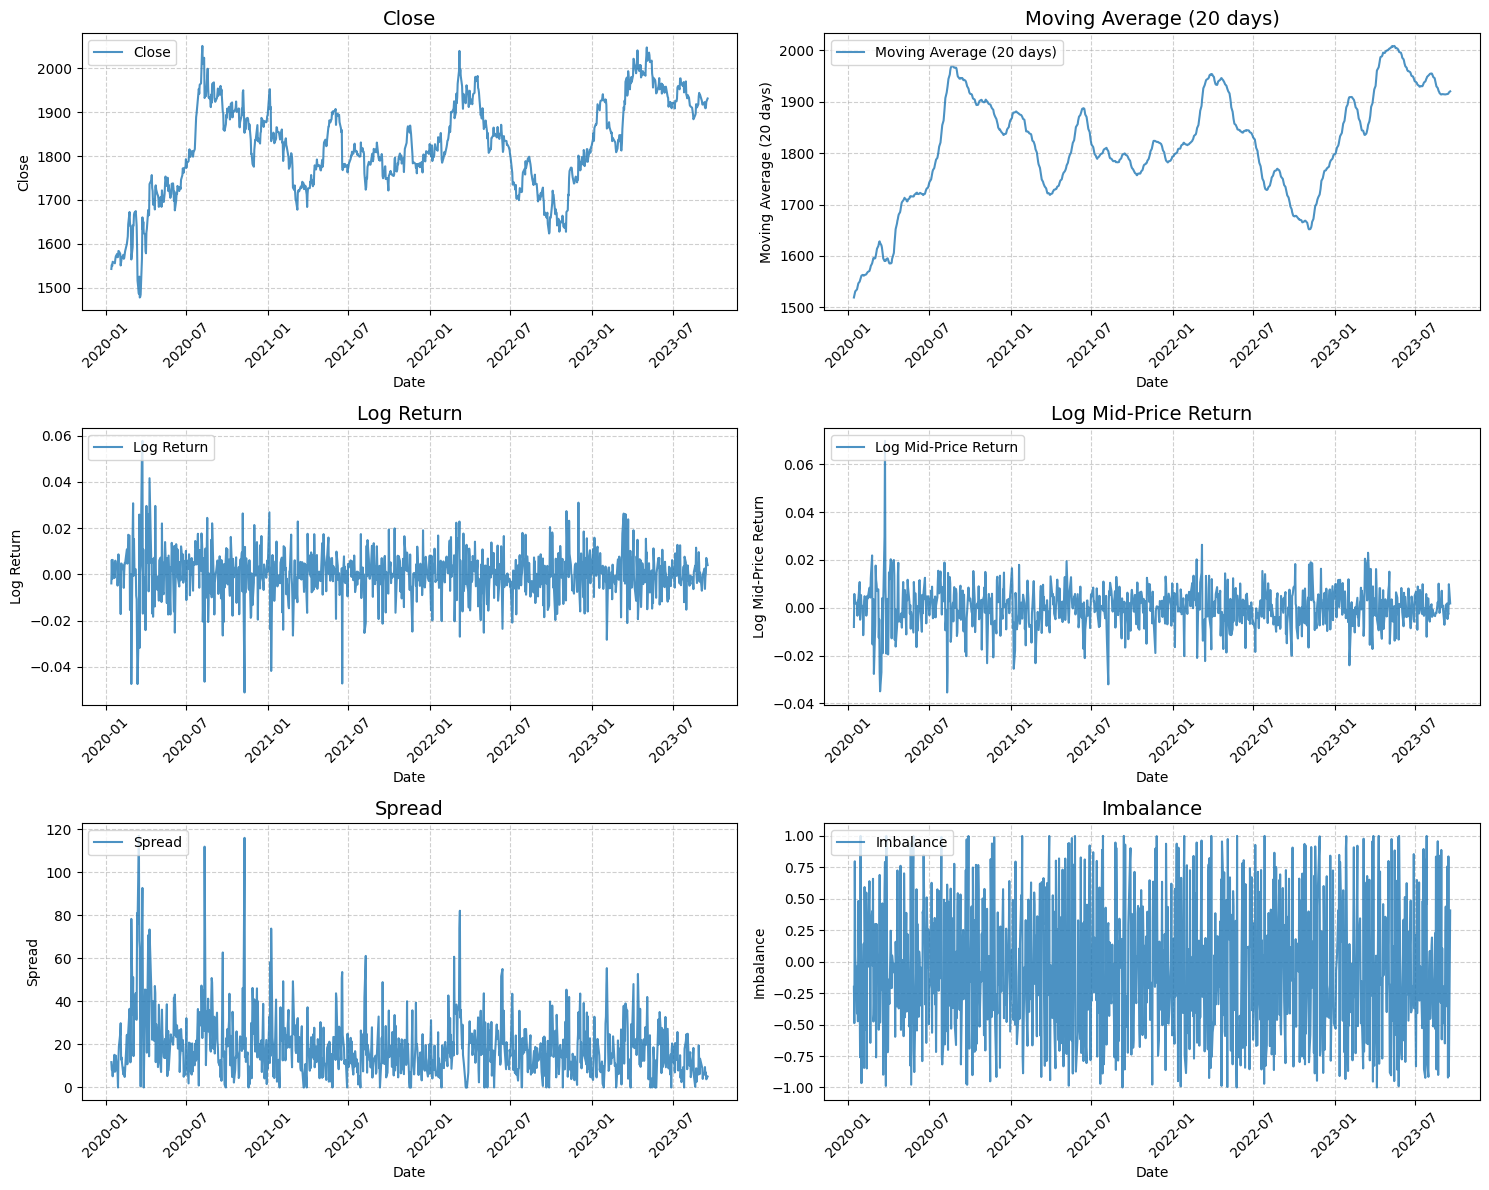

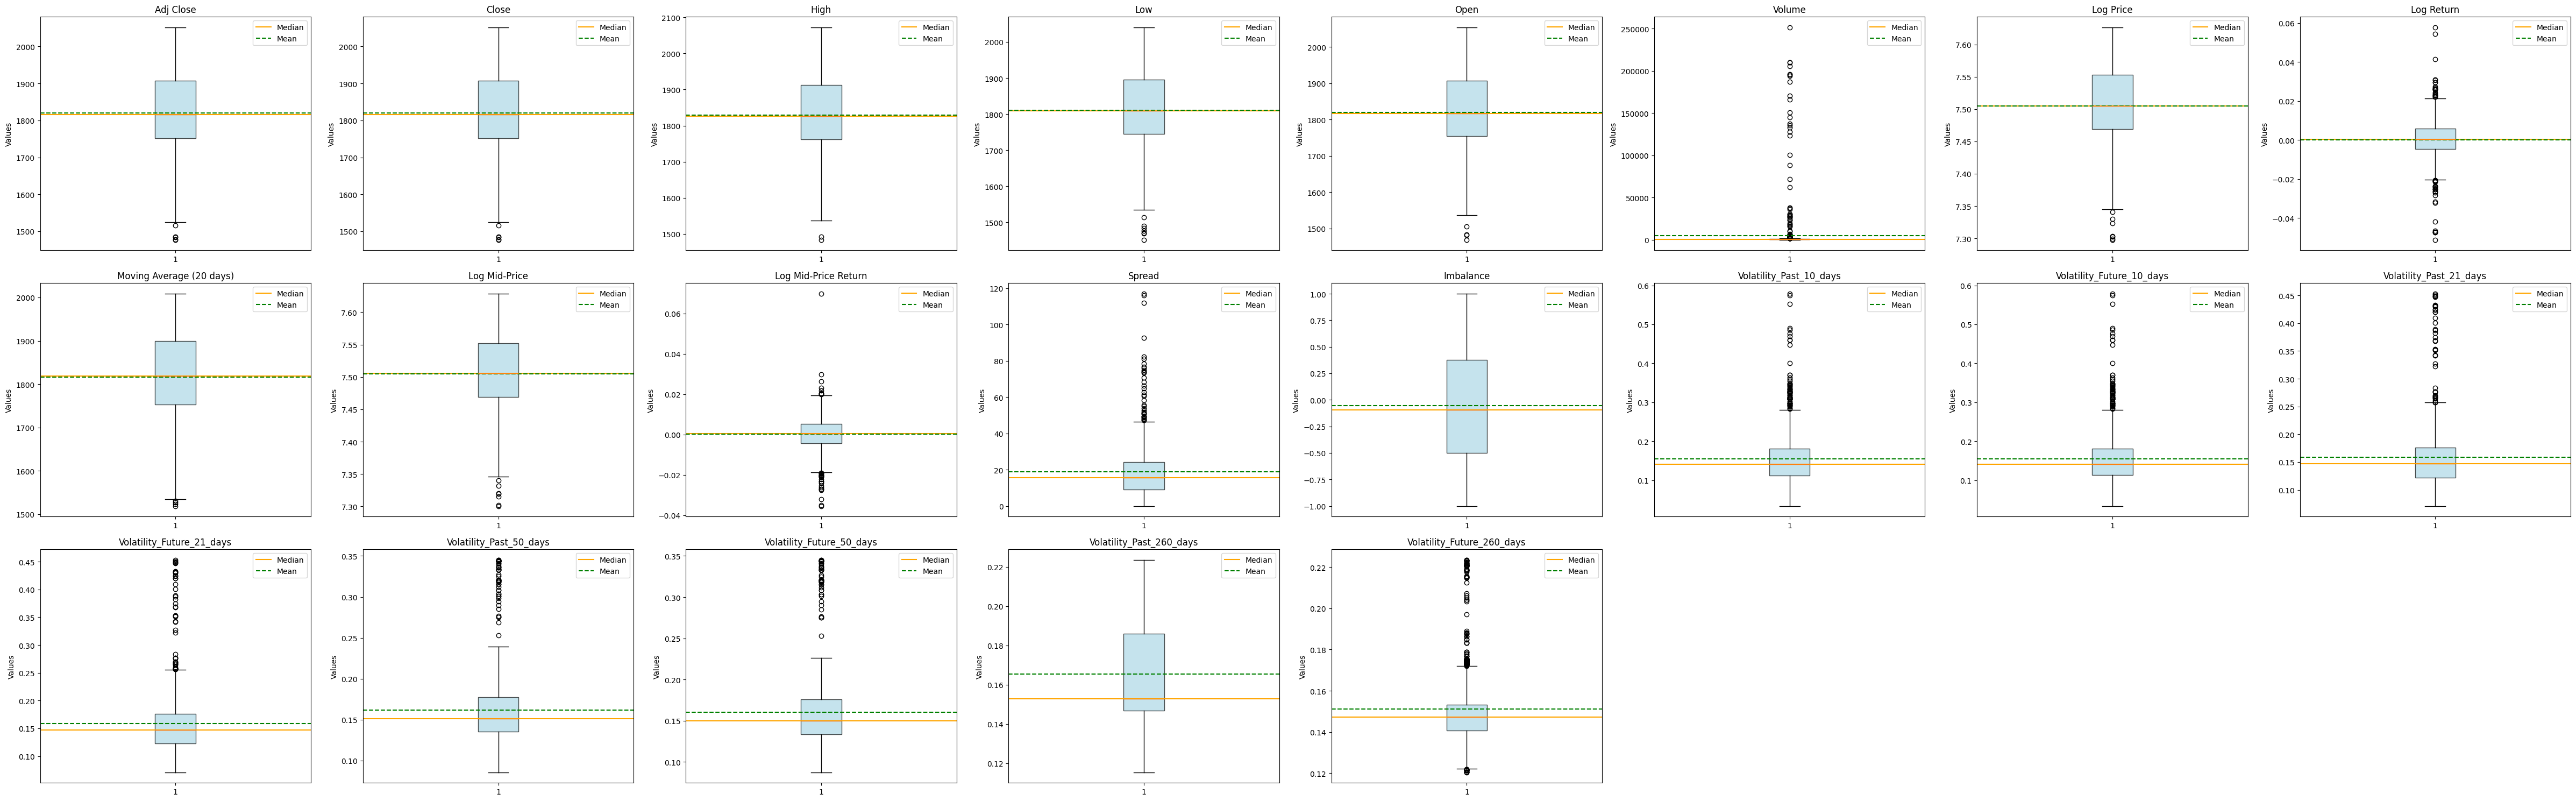

In [14]:
# Visualize all key metrics in a single multi-panel plot
data_visualization.plot_metrics(gold_data_engineered_cleaned[["Close", "Moving Average (20 days)", "Log Return", "Log Mid-Price Return", "Spread", "Imbalance"]])

# Outliers identification
# Plot box plots for all numeric variables
data_visualization.plot_boxplots(gold_data_engineered_cleaned, plots_per_column=8)


We keep only the main features we will use for model training

In [15]:
selected_features = gold_data_engineered_cleaned[['Imbalance', 'Spread', 'Log Mid-Price Return', 'Moving Average (20 days)', 'Log Return', 'Volume', 'Close', 'Volatility_Past_10_days', 'Volatility_Past_21_days', 'Volatility_Past_50_days','Volatility_Past_260_days']]
selected_target_features = gold_data_engineered_cleaned[['Volatility_Future_10_days', 'Volatility_Future_21_days', 'Volatility_Future_50_days','Volatility_Future_260_days']]

display(selected_features)

Imbalance     Spread  Log Mid-Price Return  \
Date                                                     
2020-01-14  -0.200000  11.799927             -0.008016   
2020-01-15  -0.488372   8.300049              0.005792   
2020-01-16   0.798165   7.599976              0.001644   
2020-01-17   0.048544   5.200073              0.002509   
2020-01-21  -0.411765  15.199951              0.001541   
...               ...        ...                   ...   
2023-09-12   0.759036   9.500000             -0.004686   
2023-09-13  -0.921053   5.699951             -0.002247   
2023-09-14   0.836957   7.000000             -0.002750   
2023-09-15  -0.909605   3.800049              0.009865   
2023-09-18   0.407407   5.099976              0.001842   

            Moving Average (20 days)  Log Return  Volume        Close  \
Date                                                                    
2020-01-14               1519.144995   -0.003882      32  1542.400024   
2020-01-15               1522.999994    0.006269      11  1552.099976   
2020-01-16               1526.719995   -0.001999      98  1549.000000   
2020-01-17               1531.029999    0.006307     108  1558.800049   
2020-01-21               1534.940002   -0.001541      45  1556.400024   
...                              ...         ...     ...          ...   
2023-09-12               1914.890002   -0.006259     365  1911.300049   
2023-09-13               1915.220001   -0.001152      15  1909.099976   
2023-09-14               1915.915002    0.000471     169  1910.000000   
2023-09-15               1917.895001    0.007147       8  1923.699951   
2023-09-18               1920.165002    0.004047      19  1931.500000   

            Volatility_Past_10_days  Volatility_Past_21_days  \
Date                                                           
2020-01-14                 0.122961                 0.095134   
2020-01-15                 0.124848                 0.095243   
2020-01-16                 0.126280                 0.095992   
2020-01-17                 0.102140                 0.096449   
2020-01-21                 0.084620                 0.096547   
...                             ...                      ...   
2023-09-12                 0.080586                 0.078028   
2023-09-13                 0.058205                 0.078018   
2023-09-14                 0.051216                 0.076507   
2023-09-15                 0.067127                 0.078980   
2023-09-18                 0.071077                 0.075440   

            Volatility_Past_50_days  Volatility_Past_260_days  
Date                                                           
2020-01-14                 0.104517                  0.115681  
2020-01-15                 0.105152                  0.115562  
2020-01-16                 0.105304                  0.115338  
2020-01-17                 0.096915                  0.115444  
2020-01-21                 0.096310                  0.115413  
...                             ...                       ...  
2023-09-12                 0.088941                  0.141818  
2023-09-13                 0.088966                  0.141599  
2023-09-14                 0.088949                  0.141456  
2023-09-15                 0.089466                  0.141269  
2023-09-18                 0.087552                  0.141130  

[926 rows x 11 columns]

Lead-lag computation

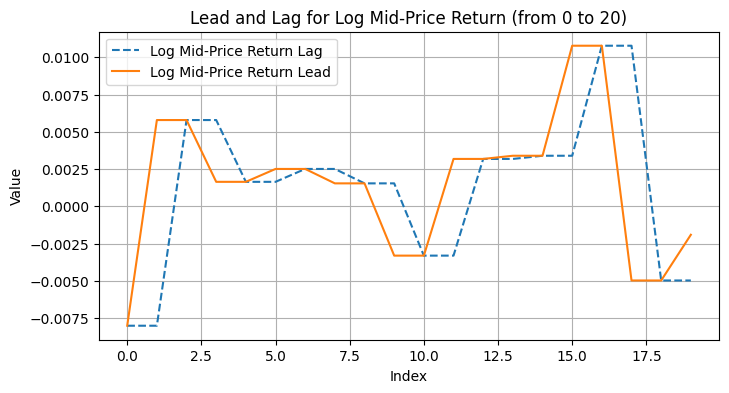

In [16]:
# Step 3: Apply lead-lag transformation
lead_lag_data = data_processing.apply_lead_lag(selected_features, lead_lag_columns=['Log Mid-Price Return'])

# Visualize the transformed features lead-lag
data_visualization.plot_lead_lag(lead_lag_data, ["Log Mid-Price Return"])



Signatures computation

In [17]:
# Compute the signature of order 3 for the lead-lag data
signatures_order_2 = data_processing.compute_signature(
    selected_features,
    order=2,
    windows=[21],
    # exclude_cols = [] # Example: exclude the normalized time if present
)


Quick visualization of the signatures

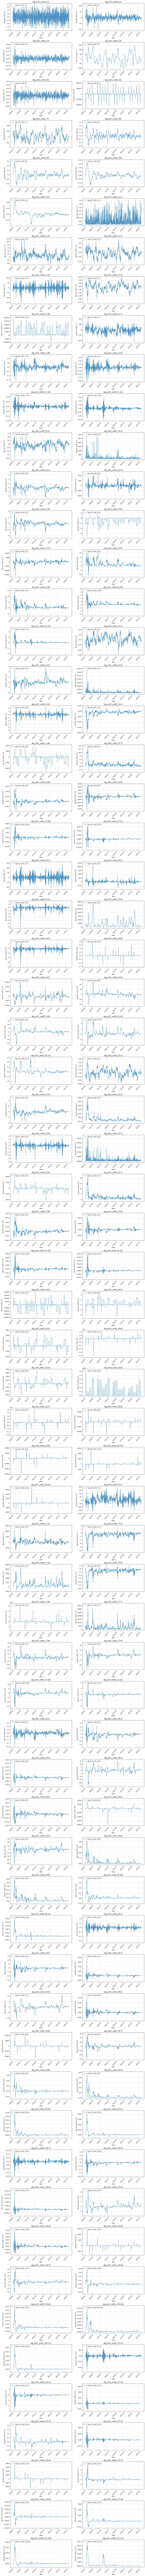

In [18]:
data_visualization.plot_metrics(signatures_order_2)

Data formatting

In [23]:

# Step 4: Normalize the time column which can't be normalise as needed by transformers:
# time_normalized_data = data_processing.normalize_features(gold_data)

# We split the dataframe into a train and a test set:
X_train, X_test, Y_train, Y_test = data_processing.split_train_test(selected_features, signatures_order_2, selected_target_features, 'Volatility_Future_21_days',  0.2, random_state = 42)


            Imbalance     Spread  Log Mid-Price Return  \
Date                                                     
2020-06-12  -0.043609  18.099976              0.001096   
2020-02-27  -0.475714  19.500000              0.003647   
2022-07-25   0.046875  13.000000              0.000870   
2021-02-09  -0.159817  12.600098              0.007733   
2022-01-04  -0.506494  15.300049             -0.003755   
...               ...        ...                   ...   
2020-07-15  -0.339921   7.400024              0.004735   
2021-03-10   0.103079  11.900024              0.009127   
2023-07-14  -0.125581   7.900024             -0.000204   
2021-11-02   0.200000   7.800049              0.000391   
2020-07-09   0.309091  20.600098             -0.000111   

            Moving Average (20 days)  Log Return  Volume        Close  \
Date                                                                    
2020-06-12               1722.195013   -0.001560     318  1729.300049   
2020-02-27               1

Pipeline/Model Conception and training